## Molecular-Fingerprints with Python and RDKit for AI models


Molecular fingerprints are vectors that represent the presence or absence of substructures within a molecule. These vectors are essential for comparing molecules and building predictive models, as they allow complex chemical structures to be transformed into formats that machine learning algorithms can handle.

In [1]:
# Import libraries

import pandas as pd
from rdkit.Chem import PandasTools

from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import numpy as np


from rdkit import Chem, DataStructs


## Preparation of Molecular Data

Let's start by creating a DataFrame that contains some molecules represented in SMILES format and their respective molecular weights. This table will serve as the basis for generating the fingerprints.

In [2]:

df = pd.DataFrame(
   data={
       'smiles': [
           'CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C',
           'CC(=O)OC(CC(=O)O)C[N+](C)(C)C',
           'CC(CN)O',
           'C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl',
           'CCN1C=NC2=C(N=CN=C21)N',
           'CCC(C)(C(C(=O)O)O)O',
           'C(CCl)Cl',
           'C1=CC(=C(C=C1Cl)Cl)Cl',
           'C1CCC(=O)NCCCCCC(=O)NCC1',
           'C1C=CC(=NC1C(=O)O)C(=O)O'
       ],
       'mw': [
           203.24, 204.24, 75.11, 202.55, 163.18, 148.16, 98.96, 181.4, 226.32, 169.13
       ]
   }
)

df

,smiles,mw
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24
2,CC(CN)O,75.11
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55
4,CCN1C=NC2=C(N=CN=C21)N,163.18
5,CCC(C)(C(C(=O)O)O)O,148.16
6,C(CCl)Cl,98.96
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13


## Molecule Representation

Using RDKit, we can add a column to the DataFrame containing the molecular representations corresponding to the SMILES. Unlike the method we used in the previous post, the AddMoleculeColumnToFrame method from the PandasTools library simplifies this task.

,smiles,mw,ROMol
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,
2,CC(CN)O,75.11,
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,
4,CCN1C=NC2=C(N=CN=C21)N,163.18,
5,CCC(C)(C(C(=O)O)O)O,148.16,
6,C(CCl)Cl,98.96,
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40,
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32,
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13,

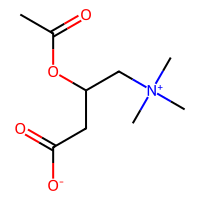
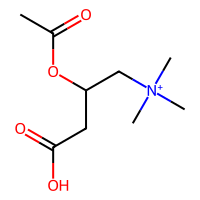
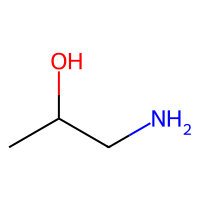
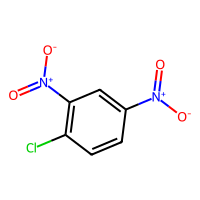
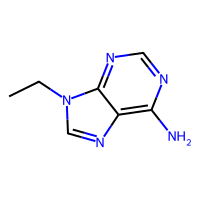
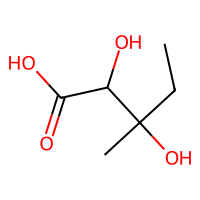
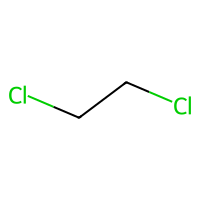
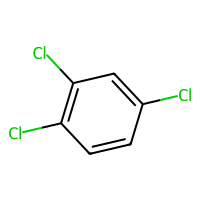
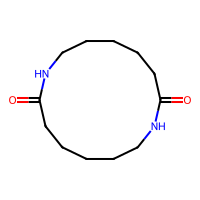
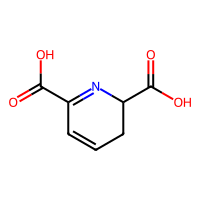

In [3]:
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='smiles')
df

## MACCS Fingerprints

MACCS (Molecular ACCess System) fingerprints are one of the most commonly used representations to characterize molecules. They are based on the presence of specific substructures.

,smiles,mw,ROMol,maccs
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(CN)O,75.11,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CCN1C=NC2=C(N=CN=C21)N,163.18,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,CCC(C)(C(C(=O)O)O)O,148.16,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,C(CCl)Cl,98.96,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

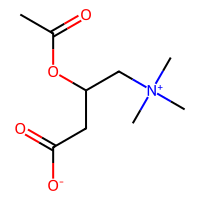
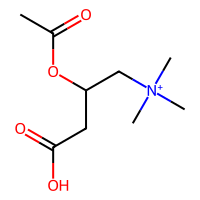
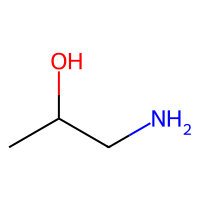
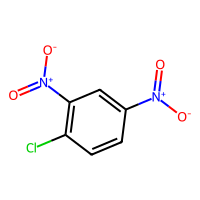
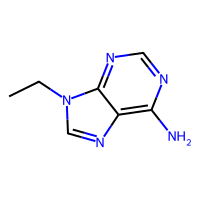
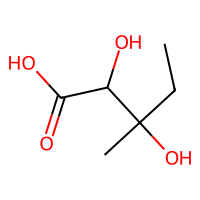
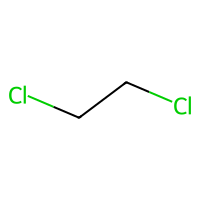
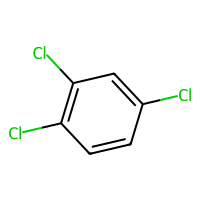
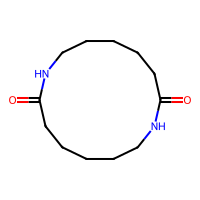
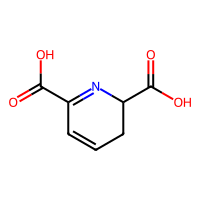

In [4]:

def maccs_fp(mol):
    return MACCSkeys.GenMACCSKeys(mol)

df['maccs'] = df['ROMol'].apply(maccs_fp)
df

## Morgan Fingerprints

Another widely used representation is the Morgan fingerprint, which is based on the analysis of the neighborhood of atoms within a molecule. The Morgan algorithm is flexible and can be adjusted in terms of radius (radius) and vector size (fpSize).

,smiles,mw,ROMol,maccs,morgan
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2,CC(CN)O,75.11,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CCN1C=NC2=C(N=CN=C21)N,163.18,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
5,CCC(C)(C(C(=O)O)O)O,148.16,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,C(CCl)Cl,98.96,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

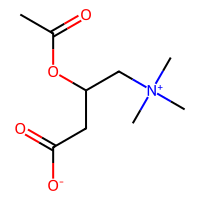
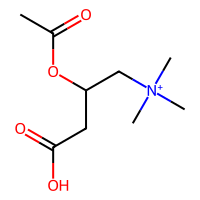
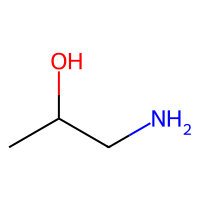
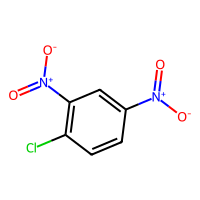
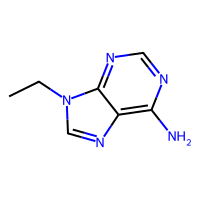
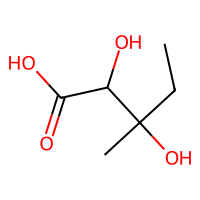
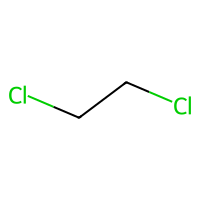
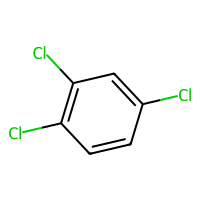
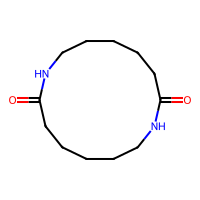
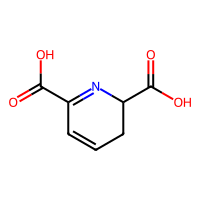

In [5]:

# Function to generate Morgan fingerprints
def morgan_fp(mol):
    # Generation of binary fingerprint of 512 bits and radio 2
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=512)
    arr = np.zeros((512,), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply to DataFrame
df['morgan'] = df['ROMol'].apply(morgan_fp)

# Show the DataFrame
df


In [6]:

# Function for Morgan Count Fingerprint
def morgan_count_fp(mol, radius=2, nBits=512):
    """
    Genera un Morgan Count Fingerprint como numpy array
    """
    # Generate CountFingerprint (Hash vector)
    fp = AllChem.GetHashedMorganFingerprint(mol, radius=radius, nBits=nBits)
    
    # Convert to a numpy array
    arr = np.zeros((nBits,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply to DataFrame
df['morgan_count'] = df['ROMol'].apply(morgan_count_fp)

# Show result
df.head()


,smiles,mw,ROMol,maccs,morgan,morgan_count
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,<rdkit.Chem.rdchem.Mol object at 0x7f8772879510>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,<rdkit.Chem.rdchem.Mol object at 0x7f8772879570>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2,CC(CN)O,75.11,<rdkit.Chem.rdchem.Mol object at 0x7f8772879210>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,<rdkit.Chem.rdchem.Mol object at 0x7f87728794b0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CCN1C=NC2=C(N=CN=C21)N,163.18,<rdkit.Chem.rdchem.Mol object at 0x7f87728792d0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
